### 1. Bildbehandling (*)
Uppgifterna nedan ska upprepas för respektive experimentdataset om du också väljer att arbeta med
tinydatasetet.


- a) Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import os
import shutil
from myfunctions import save_images

plt.style.use("seaborn-white")

train_dir = os.path.abspath("experiment_tiny_data/train/")
val_dir = os.path.abspath("experiment_tiny_data/val/")
test_dir = os.path.abspath("experiment_tiny_data/test/")

In [2]:
def plot_img_size(train_dir, train_name):
    heights = []
    widths = []
    imagefiles=[os.path.join(train_dir,f) for f in os.listdir(train_dir)]
    for image in imagefiles:
        img = plt.imread(image)
        #print(f"Original shape {img.shape}")
        height = img.shape[0]
        width = img.shape[1]
        heights.append(height)
        widths.append(width)

    figure = sns.jointplot(x=widths, y=heights)
    figure.ax_joint.set_xlabel('width')
    figure.ax_joint.set_ylabel('height')
    figure.fig.suptitle(f"Image size: {train_name}", size=12, fontweight='bold');



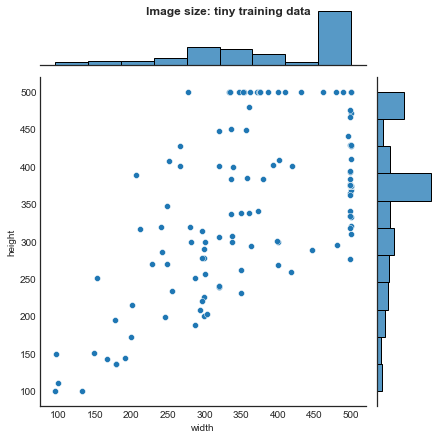

In [3]:
plot_img_size("experiment_tiny_data/train/", "tiny training data")

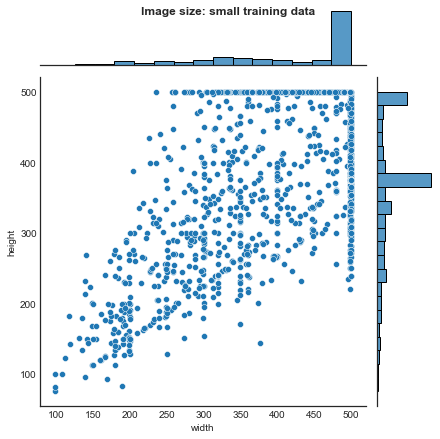

In [4]:
plot_img_size("experiment_small_data/train/", "small training data")

- b) Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver
slänga bilder. Hur kommer du fram till ditt val?


In [ ]:
IMG_SIZE = 60

- c) Gör resize sådant att samtliga bilder är samma storlek och spara dem i numpy arrays med följande
struktur:
Visualisera därefter ett par styckena bilder.


In [27]:
def resize_images(source_path, IMG_SIZE=60):
    data = os.listdir(source_path)
    new_data = []

    for img_name in data:
        img = cv2.imread(f"{source_path}{img_name}")
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        new_data.append(img)
        #new_data = np.asarray(new_data)
        #target_path = f"{processed_images_path}/{img_name}"
        #shutil.copyfile(source_path, target_path)
        
    new_data = np.asarray(new_data)    
    return new_data

In [28]:
X_train_small_resized = resize_images("experiment_small_data/train/")
X_val_small_resized  = resize_images("experiment_small_data/val/")
X_test_small_resized  = resize_images("experiment_small_data/test/")
X_train_tiny_resized  = resize_images("experiment_tiny_data/train/")
X_val_tiny_resized  = resize_images("experiment_tiny_data/val/")
X_test_tiny_resized  = resize_images("experiment_tiny_data/test/")



In [29]:
X_val_tiny_resized 


array([[[[ 50,  24, 161],
         [ 50,  24, 161],
         [ 52,  23, 162],
         ...,
         [ 53,  27, 172],
         [ 85, 102, 164],
         [ 94, 116, 159]],

        [[ 50,  24, 160],
         [ 50,  24, 162],
         [ 47,  41, 131],
         ...,
         [110, 139, 176],
         [ 53,  37, 162],
         [ 69,  75, 151]],

        [[ 50,  28, 157],
         [ 48,  18, 169],
         [ 72,  69, 152],
         ...,
         [ 74,  99, 163],
         [103, 105, 188],
         [ 50,  23, 164]],

        ...,

        [[ 58,  33, 175],
         [ 59,  27, 175],
         [ 58,  28, 163],
         ...,
         [ 57,  36, 172],
         [ 55,  39, 173],
         [ 61,  47, 178]],

        [[ 68,  32, 198],
         [ 67,  31, 197],
         [ 65,  30, 194],
         ...,
         [ 56,  49, 140],
         [ 58,  45, 153],
         [ 57,  39, 171]],

        [[ 59,  31, 166],
         [ 60,  30, 171],
         [ 61,  30, 175],
         ...,
         [ 49,  52, 126],
        

- d) Augmentera datan. Varför behövs dataaugmentering och hur beslutar vilka parametrar du valt för
augmenteringen?